# 1 Analisis E Insights

# 0 Actuaciones Previas

## 0.1 Set Up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%config IPCompleter.greedy= True

pd.options.display.float_format = '{:15.2f}'.format

sns.set_theme(style = 'whitegrid')

## 0.2. Carga de datos

In [2]:
df = pd.read_pickle('../Datos/tablon_analitico.pickle')
df.head(3)

,usuario,sesion,categoria,evento,producto,precio,categoria_cod,marca,date,año,mes,dia,hora,minuto,segundo,festivo,black_friday,san_valentin
fecha,,,,,,,,,,,,,,,,,,
2019-10-01 00:01:46,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,1487580005092295511,view,5843665,9.44,None,f.o.x,2019-10-01,2019,10,1,0,1,46,0,0,0
2019-10-01 00:01:55,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,1487580013069861041,cart,5868461,3.57,None,italwax,2019-10-01,2019,10,1,0,1,55,0,0,0
2019-10-01 00:02:50,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,1487580006300255120,view,5877456,122.22,None,jessnail,2019-10-01,2019,10,1,0,2,50,0,0,0


In [3]:
clientes = pd.read_csv('..//Datos/clientes.csv')
clientes

,usuario,productos_tot_num,compras_tot_num,precio_medio_prod,ultima_compra,gasto_tot,productos_por_compra,F,M,ult_compra_dias,R,valor,RFM
0,25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73,3,5,311
1,27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33,4,6,411
2,50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77,3,5,311
3,52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142,1,3,111
4,65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110,2,4,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11035,621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0,5,7,511
11036,622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0,5,7,511
11037,622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0,5,7,511
11038,622042698,3,1,28.04,2020-02-29,84.13,3.00,1,1,0,5,7,511


# 1 Analisis de cohortes

**<U>Objetivo: ¿ Cual es la tasa de supervivencia de los clientes?</U>**

Construccion del dataframe

In [4]:
c = df.loc[df.evento =='purchase',['usuario','mes']]
c

,usuario,mes
fecha,,
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
...,...,...
2020-02-29 22:29:19,622065819,2
2020-02-29 22:29:19,622065819,2
2020-02-29 22:29:19,622065819,2


In [5]:
c = pd.crosstab(c.usuario,c.mes).reset_index()
c

mes,usuario,1,2,10,11,12
0,25392526,0,0,0,0,3
1,27756757,1,0,0,0,0
2,50748978,0,0,0,0,9
3,52747911,0,0,3,0,0
4,65241811,0,0,0,5,0
...,...,...,...,...,...,...
11035,621995551,0,5,0,0,0
11036,622021687,0,1,0,0,0
11037,622041514,0,3,0,0,0
11038,622042698,0,3,0,0,0


In [6]:
# Renombramos las columnas. Cada usuario es una fila podemos eliminar esa columna
c.columns = ['usuario','c4','c5','c1','c2','c3']
c.drop(columns = 'usuario', inplace = True)
c

,c4,c5,c1,c2,c3
0,0,0,0,0,3
1,1,0,0,0,0
2,0,0,0,0,9
3,0,0,3,0,0
4,0,0,0,5,0
...,...,...,...,...,...
11035,0,5,0,0,0
11036,0,1,0,0,0
11037,0,3,0,0,0
11038,0,3,0,0,0


Cohorte 2

Crear base - Clientes que han comprado en el mes 2 y no lo han hecho en el mes 1.

Binarizamo: Han comprado o no.

Seguimiento supervivencia

In [7]:
c2 = c.loc[(c.c1 == 0) & (c.c2 > 0)]
c2

,c4,c5,c1,c2,c3
4,0,0,0,5,0
6,0,0,0,10,0
8,0,0,0,27,17
9,0,0,0,3,0
13,0,0,0,4,0
...,...,...,...,...,...
7702,0,0,0,5,0
7703,0,5,0,2,0
7705,0,0,0,1,0
7708,0,0,0,5,6


In [8]:
def binarizar(variable):
    variable = variable.transform(lambda x: 1 if (x > 0) else 0)
    return(variable)

In [9]:
c2_b = c2.apply(binarizar)
c2_b

,c4,c5,c1,c2,c3
4,0,0,0,1,0
6,0,0,0,1,0
8,0,0,0,1,1
9,0,0,0,1,0
13,0,0,0,1,0
...,...,...,...,...,...
7702,0,0,0,1,0
7703,0,1,0,1,0
7705,0,0,0,1,0
7708,0,0,0,1,1


In [10]:
c2_b = c2_b.mean().sort_index()
c2_b 

c1              0.00
c2              1.00
c3              0.10
c4              0.10
c5              0.08
dtype: float64

In [11]:
c3 = c.loc[(c.c1 == 0) & (c.c2 == 0) &(c.c3 > 0)]
c3

,c4,c5,c1,c2,c3
0,0,0,0,0,3
2,0,0,0,0,9
10,11,0,0,0,3
11,0,0,0,0,14
12,0,0,0,0,1
...,...,...,...,...,...
8874,0,0,0,0,2
8876,0,0,0,0,1
8877,0,0,0,0,2
8878,0,0,0,0,6


In [12]:
c3_b = c3.apply(binarizar)
c3_b = c3_b.mean().sort_index()
c3_b

c1              0.00
c2              0.00
c3              1.00
c4              0.09
c5              0.06
dtype: float64

In [13]:
c4 = c.loc[(c.c1 == 0) & (c.c2 == 0) &(c.c3 == 0) & (c.c4 > 0)]
c4_b = c4.apply(binarizar)
c4_b = c4_b.mean().sort_index()
c4_b

c1              0.00
c2              0.00
c3              0.00
c4              1.00
c5              0.09
dtype: float64

In [14]:
cohortes = pd.DataFrame(
                        {'c2':c2_b,
                         'c3':c3_b,
                         'c4':c4_b})
cohortes = cohortes.drop(index = 'c1').T
cohortes

,c2,c3,c4,c5
c2,1.00,0.10,0.10,0.08
c3,0.00,1.00,0.09,0.06
c4,0.00,0.00,1.00,0.09


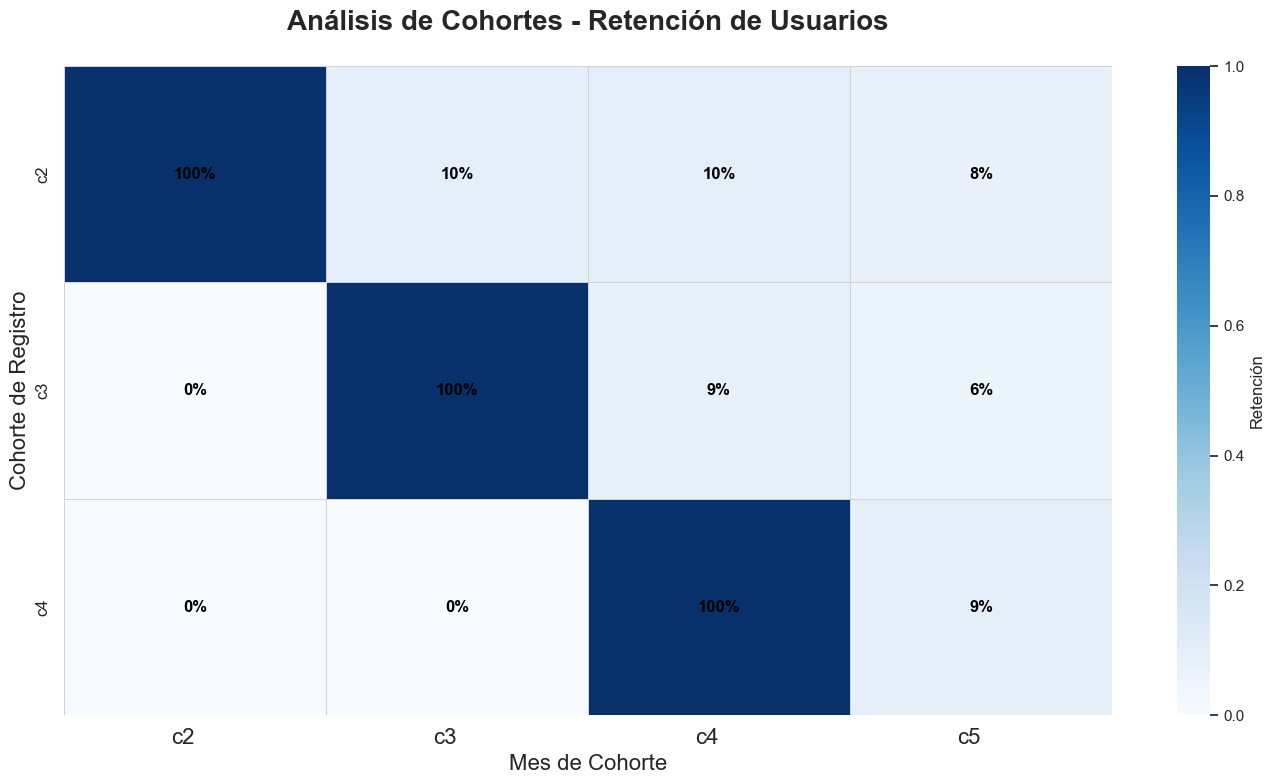

In [15]:
plt.figure(figsize=(14, 8))

sns.set(style="white")  # Fondo blanco limpio
ax = sns.heatmap(
    data=cohortes,
    annot=True,
    fmt=".0%",
    cmap="Blues",  # Puedes usar 'Greys' si prefieres, pero 'Blues' resalta más
    linewidths=0.5,
    linecolor='lightgrey',
    cbar_kws={'label': 'Retención'},  # Barra de color con etiqueta
    annot_kws={"size": 12, "weight": "bold", "color": "black"}
)

# Títulos y etiquetas
plt.title("Análisis de Cohortes - Retención de Usuarios", fontsize=20, weight='bold', pad=26)
plt.xlabel("Mes de Cohorte", fontsize=16)
plt.ylabel("Cohorte de Registro", fontsize=16)

# Ajustes de los ejes
plt.xticks( ha='right', fontsize=16)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


**<U>Conclusiones: ¿ Cual es la supervivencia de los clientes?</U>**

**<U>INSIGHT #6</u>**
* El 90% de los nuevos clientes no vuelve a comprar en los meses posteriores.

# 2 Analisis de LTV

**<U>Objetivo: ¿Cual es el LTV de los clientes?</U>**

* En marketing, LTV significa "Lifetime Value" o "Valor del Tiempo de Vida del Cliente". 

* Es una métrica que indica cuánto ingreso genera, en promedio, un cliente a lo largo de toda su relación con una empresa.

* Metodo de calculo:

    - **LTV = Valor promedio de compra × Frecuencia de compra × Duración del cliente**

    - **LTV = Ingreso mensual promedio por cliente × Número de meses de retención**


In [16]:
# Definicion
clientes = df.loc[df.evento == 'purchase'].groupby('usuario').agg({
                                                       'producto':'count' ,
                                                       'sesion': 'nunique' ,
                                                       'precio': 'mean' ,
                                                        'date':'max'})
# Renombramos columnas
clientes.columns = ['productos_tot_num','compras_tot_num','precio_medio_prod','ultima_compra']

# Variables derivadas
clientes['gasto_tot'] = clientes.productos_tot_num * clientes.precio_medio_prod
clientes['productos_por_compra'] = clientes.productos_tot_num / clientes.compras_tot_num
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ultima_compra,gasto_tot,productos_por_compra
usuario,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00
27756757,1,1,20.63,2020-01-27,20.63,1.00
50748978,9,1,1.11,2019-12-14,10.01,9.00
52747911,3,1,7.67,2019-10-10,23.02,3.00
65241811,5,1,8.36,2019-11-11,41.79,5.00
...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00
622021687,1,1,13.33,2020-02-29,13.33,1.00
622041514,3,1,0.63,2020-02-29,1.90,3.00


In [17]:
maestro_ltv = df.loc[(df.evento =='purchase')&(df.mes!=10)&(df.mes==11),'usuario'].to_list()
maestro_ltv = list(set(maestro_ltv))

clientes_ltv = clientes.loc[clientes.index.isin(maestro_ltv)]
clientes_ltv

,productos_tot_num,compras_tot_num,precio_medio_prod,ultima_compra,gasto_tot,productos_por_compra
usuario,,,,,,
65241811,5,1,8.36,2019-11-11,41.79,5.00
80577370,10,2,10.62,2019-11-29,106.24,5.00
88211255,22,4,4.86,2020-02-25,106.87,5.50
93279832,44,2,3.19,2019-12-19,140.51,22.00
94390236,3,1,9.73,2019-11-07,29.20,3.00
...,...,...,...,...,...,...
579798049,5,1,2.10,2019-11-30,10.52,5.00
579813390,7,2,2.98,2020-02-04,20.83,3.50
579834429,1,1,27.14,2019-11-30,27.14,1.00


In [18]:
clientes_ltv.gasto_tot.describe()

count           3105.00
mean              79.62
std              113.62
min                0.13
25%               20.29
50%               41.49
75%               90.00
max             1453.37
Name: gasto_tot, dtype: float64

**<u>CONCLUSIONES: ¿ Cual es el LTV de los clientes?</u>**

* Tenemos clientes con un gasto muy alto que no deberian ser tenidos en cuenta.

* Usamos mediana como medida de centralidad el LTV a 4 meses es 42 euros.

<U>**INSIGHT #8**</u>

* El LTV medio es de 42 Euros a 4 meses.

# 3 Modelo RFM

In [19]:
df['categoria_cod'].value_counts(dropna=False)

categoria_cod
None                                      2040133
appliances.environment.vacuum               14029
stationery.cartrige                          6031
apparel.glove                                5588
furniture.living_room.cabinet                2900
accessories.bag                              2413
furniture.bathroom.bath                      2241
appliances.personal.hair_cutter               444
accessories.cosmetic_bag                      417
appliances.personal.massager                  249
appliances.environment.air_conditioner         62
furniture.living_room.chair                    25
Name: count, dtype: int64

In [20]:
none_code = df[df['categoria_cod'].isna()]
print(f'El número total de artículos sin código de categoría es: {none_code["producto"].nunique()}')

El número total de artículos sin código de categoría es: 44836


In [21]:
df['categoria'].value_counts(dropna=False)

categoria
1487580007675986893    109285
1487580005595612013     78781
1487580005092295511     76580
1487580005671109489     69757
1602943681873052386     63938
                        ...  
1487580011559911545         1
1487580008204469224         1
1487580013363462335         1
1487580009009774604         1
2053031020655018687         1
Name: count, Length: 508, dtype: int64

In [23]:
df['categoria'].nunique()

508

In [21]:
conteos = none_code['evento'].value_counts()

kpis = pd.DataFrame({
    'kpi': ['visualizaciones', 'carrito', 'abandono', 'compra'],
    'valor': [
        100,
        conteos['cart'] / conteos['view'] * 100,
        conteos['remove_from_cart'] / conteos['cart'] * 100,
        conteos['purchase'] / conteos['cart'] * 100
    ],
    'valor_absoluto': [
        conteos['view'],
        conteos['cart'],
        conteos['remove_from_cart'],
        conteos['purchase']
    ]
})
kpis

,kpi,valor,valor_absoluto
0,visualizaciones,100.00,939374
1,carrito,60.49,568211
2,abandono,71.57,406658
3,compra,22.16,125890


**<U>Conclusion</U>**

- Existen 44836 productos sin codigo categoria.

- NO afecta a las ventas de los mismos ya que estan en parametros similares a la media del resto.

**<U>INSIGHT #9</u>**

- El 98% de los productos carece de un código de categoría, lo que imposibilita la agregación y el análisis segmentado del comportamiento de compra, limitando la capacidad de generar insights a nivel de categoría.

- No afecta a las ventas de esos articulos.

**Medidas recomendadas:**

- Estandarizar y obligar la categorización de productos.

- Enriquecer datos históricos con reglas o modelos.

- Implementar políticas de calidad de datos.

- Capacitar al equipo sobre la importancia del dato categórico. 

## 3.1 Construccion del modelo

### 3.1.1 Dimension Frecuencia

Discretizamos la variable en 5 tramos.

In [22]:
# Comprobamos como quedan el numero de compras por grupo.
clientes.compras_tot_num.transform(lambda x: pd.cut(x,5, labels = False)).value_counts()

compras_tot_num
0    10886
1      137
2       11
3        4
4        2
Name: count, dtype: int64

In [23]:
# Creamos la columna Frequency
clientes['F'] = clientes.compras_tot_num.transform(lambda x: pd.cut(x,5, labels = False))+1
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ultima_compra,gasto_tot,productos_por_compra,F
usuario,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1
27756757,1,1,20.63,2020-01-27,20.63,1.00,1
50748978,9,1,1.11,2019-12-14,10.01,9.00,1
52747911,3,1,7.67,2019-10-10,23.02,3.00,1
65241811,5,1,8.36,2019-11-11,41.79,5.00,1
...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1
622021687,1,1,13.33,2020-02-29,13.33,1.00,1
622041514,3,1,0.63,2020-02-29,1.90,3.00,1


In [24]:
# Comprobacion de Frequencia media por grupo.
clientes.groupby('F').compras_tot_num.mean()

F
1              1.31
2              7.06
3             12.00
4             16.50
5             23.50
Name: compras_tot_num, dtype: float64

### 3.1.2 Dimension Monetary

In [25]:
# Creamos la columna Frequency
clientes['M'] = clientes.gasto_tot.transform(lambda x: pd.cut(x,5, labels = False))+1
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ultima_compra,gasto_tot,productos_por_compra,F,M
usuario,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1
...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1


In [26]:
clientes.groupby('M').gasto_tot.mean()

M
1             48.36
2            410.98
3            765.18
4           1043.96
5           1468.34
Name: gasto_tot, dtype: float64

### 3.1.3 Dimension Recencia

In [27]:
# Ultima compra realizadd en el e-commerce
mas_reciente = clientes.ultima_compra.max()
mas_reciente

datetime.date(2020, 2, 29)

In [28]:
# Calculamos 
clientes['ult_compra_dias'] = clientes.ultima_compra.transform(lambda x: mas_reciente -x)

# Convertimos a numero entero
clientes['ult_compra_dias'] =clientes.ult_compra_dias.dt.days
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ultima_compra,gasto_tot,productos_por_compra,F,M,ult_compra_dias
usuario,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110
...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0


In [29]:
clientes['R'] = clientes.ult_compra_dias.transform(lambda x: pd.cut(x,5, labels = False))+1
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ultima_compra,gasto_tot,productos_por_compra,F,M,ult_compra_dias,R
usuario,,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73,3
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33,2
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77,3
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142,5
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110,4
...,...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0,1
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0,1
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0,1


In [30]:
clientes.groupby('R').ult_compra_dias.mean()

R
1             14.62
2             43.04
3             75.94
4            103.85
5            135.91
Name: ult_compra_dias, dtype: float64

In [31]:
# Los resultados estan al reves, lo arreglamos
clientes['R'] = 6 - clientes['R']
clientes.groupby('R').ult_compra_dias.mean()

R
1            135.91
2            103.85
3             75.94
4             43.04
5             14.62
Name: ult_compra_dias, dtype: float64

In [32]:
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ultima_compra,gasto_tot,productos_por_compra,F,M,ult_compra_dias,R
usuario,,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73,3
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33,4
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77,3
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142,1
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110,2
...,...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0,5
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0,5
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0,5


In [33]:
clientes['valor'] = clientes['R'] + clientes['F'] + clientes['M']
clientes['RFM'] = clientes.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis=1)
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ultima_compra,gasto_tot,productos_por_compra,F,M,ult_compra_dias,R,valor,RFM
usuario,,,,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73,3,5,311
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33,4,6,411
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77,3,5,311
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142,1,3,111
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110,2,4,211
...,...,...,...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0,5,7,511
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0,5,7,511
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0,5,7,511


In [34]:
clientes.to_csv('..//Datos/clientes.csv')

### 3.1.4 Construccion del minicubo

In [35]:
metricas = ['productos_tot_num','compras_tot_num','gasto_tot']
dimensiones = ['R','F','M','RFM','valor']

minicubo = clientes[ dimensiones + metricas]
minicubo

,R,F,M,RFM,valor,productos_tot_num,compras_tot_num,gasto_tot
usuario,,,,,,,,
25392526,3,1,1,311,5,3,1,22.14
27756757,4,1,1,411,6,1,1,20.63
50748978,3,1,1,311,5,9,1,10.01
52747911,1,1,1,111,3,3,1,23.02
65241811,2,1,1,211,4,5,1,41.79
...,...,...,...,...,...,...,...,...
621995551,5,1,1,511,7,5,1,10.46
622021687,5,1,1,511,7,1,1,13.33
622041514,5,1,1,511,7,3,1,1.90


In [36]:
# Formato transaccional de dimensiones
minicubo = minicubo.melt(id_vars = metricas)
minicubo

,productos_tot_num,compras_tot_num,gasto_tot,variable,value
0,3,1,22.14,R,3
1,1,1,20.63,R,4
2,9,1,10.01,R,3
3,3,1,23.02,R,1
4,5,1,41.79,R,2
...,...,...,...,...,...
55195,5,1,10.46,valor,7
55196,1,1,13.33,valor,7
55197,3,1,1.90,valor,7
55198,3,1,84.13,valor,7


In [37]:
# Agregamos metricas con su medida en este caso medias.
minicubo = minicubo.groupby(['variable','value'], as_index = False)[metricas].mean()
minicubo

,variable,value,productos_tot_num,compras_tot_num,gasto_tot
0,F,1,10.61,1.31,52.09
1,F,2,71.42,7.06,320.47
2,F,3,123.64,12.00,643.20
3,F,4,156.75,16.50,560.15
4,F,5,124.00,23.50,652.42
...,...,...,...,...,...
58,valor,9,98.02,7.25,491.71
59,valor,10,140.89,10.22,625.93
60,valor,11,291.00,5.75,1189.31
61,valor,12,189.80,16.60,833.43


In [38]:
clientes.groupby('valor').nunique()

,productos_tot_num,compras_tot_num,precio_medio_prod,ultima_compra,gasto_tot,productos_por_compra,F,M,ult_compra_dias,R,RFM
valor,,,,,,,,,,,
3,58,5,1518,31,1446,74,1,1,31,1,1
4,65,5,2074,37,1929,103,1,2,37,2,2
5,76,7,1738,40,1622,122,2,2,40,2,3
6,75,7,2044,48,1932,141,2,4,48,4,5
7,96,9,2384,51,2250,198,2,2,51,3,4
8,84,10,127,39,127,105,2,3,39,2,4
9,44,11,56,28,56,53,3,4,28,3,5
10,9,8,9,8,9,9,4,4,8,2,5
11,4,4,4,3,4,4,3,3,3,1,3


### 3.1.5 Ampliacion del minicubo

In [39]:
# Obtenemos el numero de usuarios para la capa valor
valor_num_usuarios = clientes.reset_index()
valor_num_usuarios = valor_num_usuarios.groupby('valor').nunique()[['usuario']]
valor_num_usuarios = valor_num_usuarios.reset_index()
valor_num_usuarios.rename(columns={'usuario': 'usuario_num'}, inplace=True)
valor_num_usuarios

,valor,usuario_num
0,3,1722
1,4,2268
2,5,1970
3,6,2232
4,7,2645
5,8,127
6,9,56
7,10,9
8,11,4
9,12,5


In [40]:
# Obtenemos el numero de usuario para la capa RFM
rfm_num_usuarios = clientes.reset_index()
rfm_num_usuarios = rfm_num_usuarios.groupby('RFM').nunique()[['usuario']]
rfm_num_usuarios = rfm_num_usuarios.reset_index()
rfm_num_usuarios.rename(columns={'usuario': 'num_usuarios'}, inplace=True)
rfm_num_usuarios

,RFM,num_usuarios
0,111,1722
1,112,8
2,114,1
3,211,2260
4,212,11
5,213,2
6,221,3
7,311,1956
8,312,13
9,321,4


In [41]:
# Variables derivadas de la capa valor:
# Filtramos el minicubo por variable valor.
RFM_v = minicubo[minicubo.variable == 'valor'].copy()

# Total de productos por compra.
RFM_v['productos_por_compra'] = RFM_v['productos_tot_num'] / RFM_v['compras_tot_num']

# Numero de Compra media mensual
RFM_v['compras_med_mes _num'] =  RFM_v['compras_tot_num']/ 5
RFM_v['gasto_medio'] = RFM_v['gasto_tot'] / RFM_v['compras_tot_num']

# Union con valor_num_usuarios
RFM_v = pd.merge(RFM_v, valor_num_usuarios, how='left', left_on='value', right_on='valor')
RFM_v.drop(columns=['variable','valor'], inplace=True)

# VARIABLES DERIVADAS DE FACTURACION /--------------------------------------------------------
# Total facturacion por valor
RFM_v['fact_tot_value'] = RFM_v['gasto_tot'] * RFM_v['usuario_num']

# Calcular el total de facturación
total_facturacion = RFM_v['fact_tot_value'].sum()

# Crear la nueva columna con el porcentaje
RFM_v['fact_%_valor'] = round ((RFM_v['fact_tot_value'] / total_facturacion)*100,1)

# Crear la nueva columna con el porcentaje
RFM_v['fact_%_acum'] = RFM_v['fact_%_valor'].cumsum()

# VARIABLES DERIVADAS DE USUARIOS /------------------------------------------------------------
# Calcular el total de usuarios
total_usuarios = RFM_v['usuario_num'].sum()

RFM_v

,value,productos_tot_num,compras_tot_num,gasto_tot,productos_por_compra,compras_med_mes _num,gasto_medio,usuario_num,fact_tot_value,fact_%_valor,fact_%_acum
0,3,7.97,1.08,39.28,7.38,0.22,36.37,1722,67647.75,10.90,10.90
1,4,9.04,1.17,44.41,7.73,0.23,37.98,2268,100722.47,16.20,27.10
2,5,9.31,1.27,46.08,7.33,0.25,36.27,1970,90783.66,14.60,41.70
3,6,10.73,1.38,53.07,7.78,0.28,38.50,2232,118461.37,19.10,60.80
4,7,12.64,1.54,60.42,8.20,0.31,39.19,2645,159815.58,25.70,86.50
5,8,66.13,5.06,313.01,13.08,1.01,61.92,127,39752.10,6.40,92.90
6,9,98.02,7.25,491.71,13.52,1.45,67.82,56,27535.52,4.40,97.30
7,10,140.89,10.22,625.93,13.78,2.04,61.23,9,5633.39,0.90,98.20
8,11,291.00,5.75,1189.31,50.61,1.15,206.84,4,4757.22,0.80,99.00
9,12,189.80,16.60,833.43,11.43,3.32,50.21,5,4167.13,0.70,99.70


In [42]:
RFM_v_sorted = RFM_v.sort_values("value")
RFM_v_sorted = RFM_v_sorted[['value','fact_tot_value','fact_%_valor']]
RFM_v_sorted

,value,fact_tot_value,fact_%_valor
0,3,67647.75,10.90
1,4,100722.47,16.20
2,5,90783.66,14.60
3,6,118461.37,19.10
4,7,159815.58,25.70
5,8,39752.10,6.40
6,9,27535.52,4.40
7,10,5633.39,0.90
8,11,4757.22,0.80
9,12,4167.13,0.70


## 3.2 Explotacion del minicubo

### 3.2.1 Capa Valor

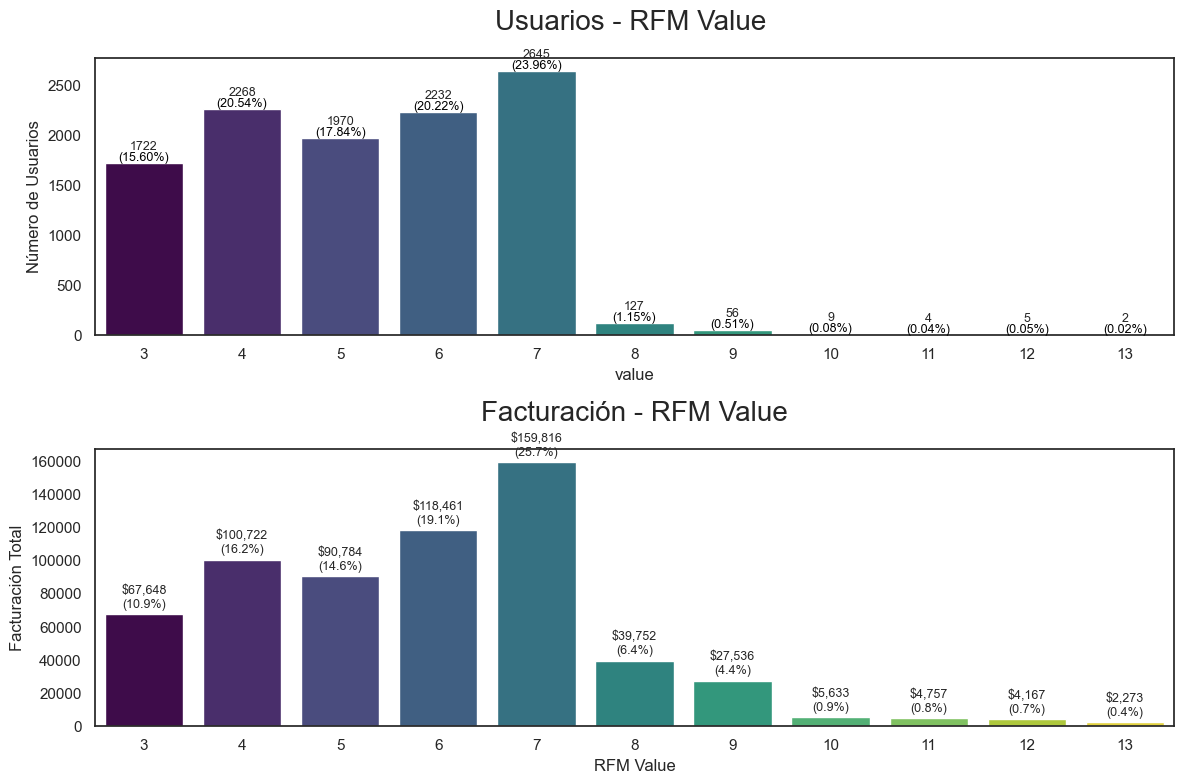

In [43]:
# Calcular la frecuencia relativa
total_usuarios = RFM_v['usuario_num'].sum()
RFM_v['usuario_fr'] = RFM_v['usuario_num'] / total_usuarios

# Asegúrate de que RFM_v esté ordenado si necesitas en el segundo gráfico
RFM_v_sorted = RFM_v.sort_values(by='value')

# Crear subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# === Primer gráfico: Número de usuarios + frecuencia relativa ===
sns.barplot(ax=axes[0], x='value', y='usuario_num', hue='value', data=RFM_v_sorted, palette='viridis', dodge=False, legend=False)

for index, row in RFM_v.iterrows():
    axes[0].text(index, row['usuario_num'] + 100, f"{int(row['usuario_num'])}", ha='center', va='bottom', fontsize=9)
    axes[0].text(index, row['usuario_num'] - 10, f"({row['usuario_fr']:.2%})", ha='center', va='bottom', fontsize=9, color='black')

axes[0].set_title('Usuarios - RFM Value ', pad=20, fontsize=20)
axes[0].set_ylabel('Número de Usuarios')
axes[1].set_xlabel('RFM Value')
axes[0].tick_params(axis='x', rotation=0)

# === Segundo gráfico: Facturación total y % por RFM ===
sns.barplot(ax=axes[1], x='value', y='fact_tot_value', hue='value', data=RFM_v_sorted, palette='viridis', dodge=False, legend=False)

for index, row in RFM_v_sorted.iterrows():
    axes[1].text(index, row['fact_tot_value'] + 2000, 
                 f"${row['fact_tot_value']:,.0f}\n({row['fact_%_valor']}%)", 
                 ha='center', va='bottom', fontsize=9)

axes[1].set_title('Facturación - RFM Value', pad=20, fontsize=20)
axes[1].set_ylabel('Facturación Total')
axes[1].set_xlabel('RFM Value')
axes[1].tick_params(axis='x', rotation=0)

# Ajuste del diseño general
plt.tight_layout()
plt.show()

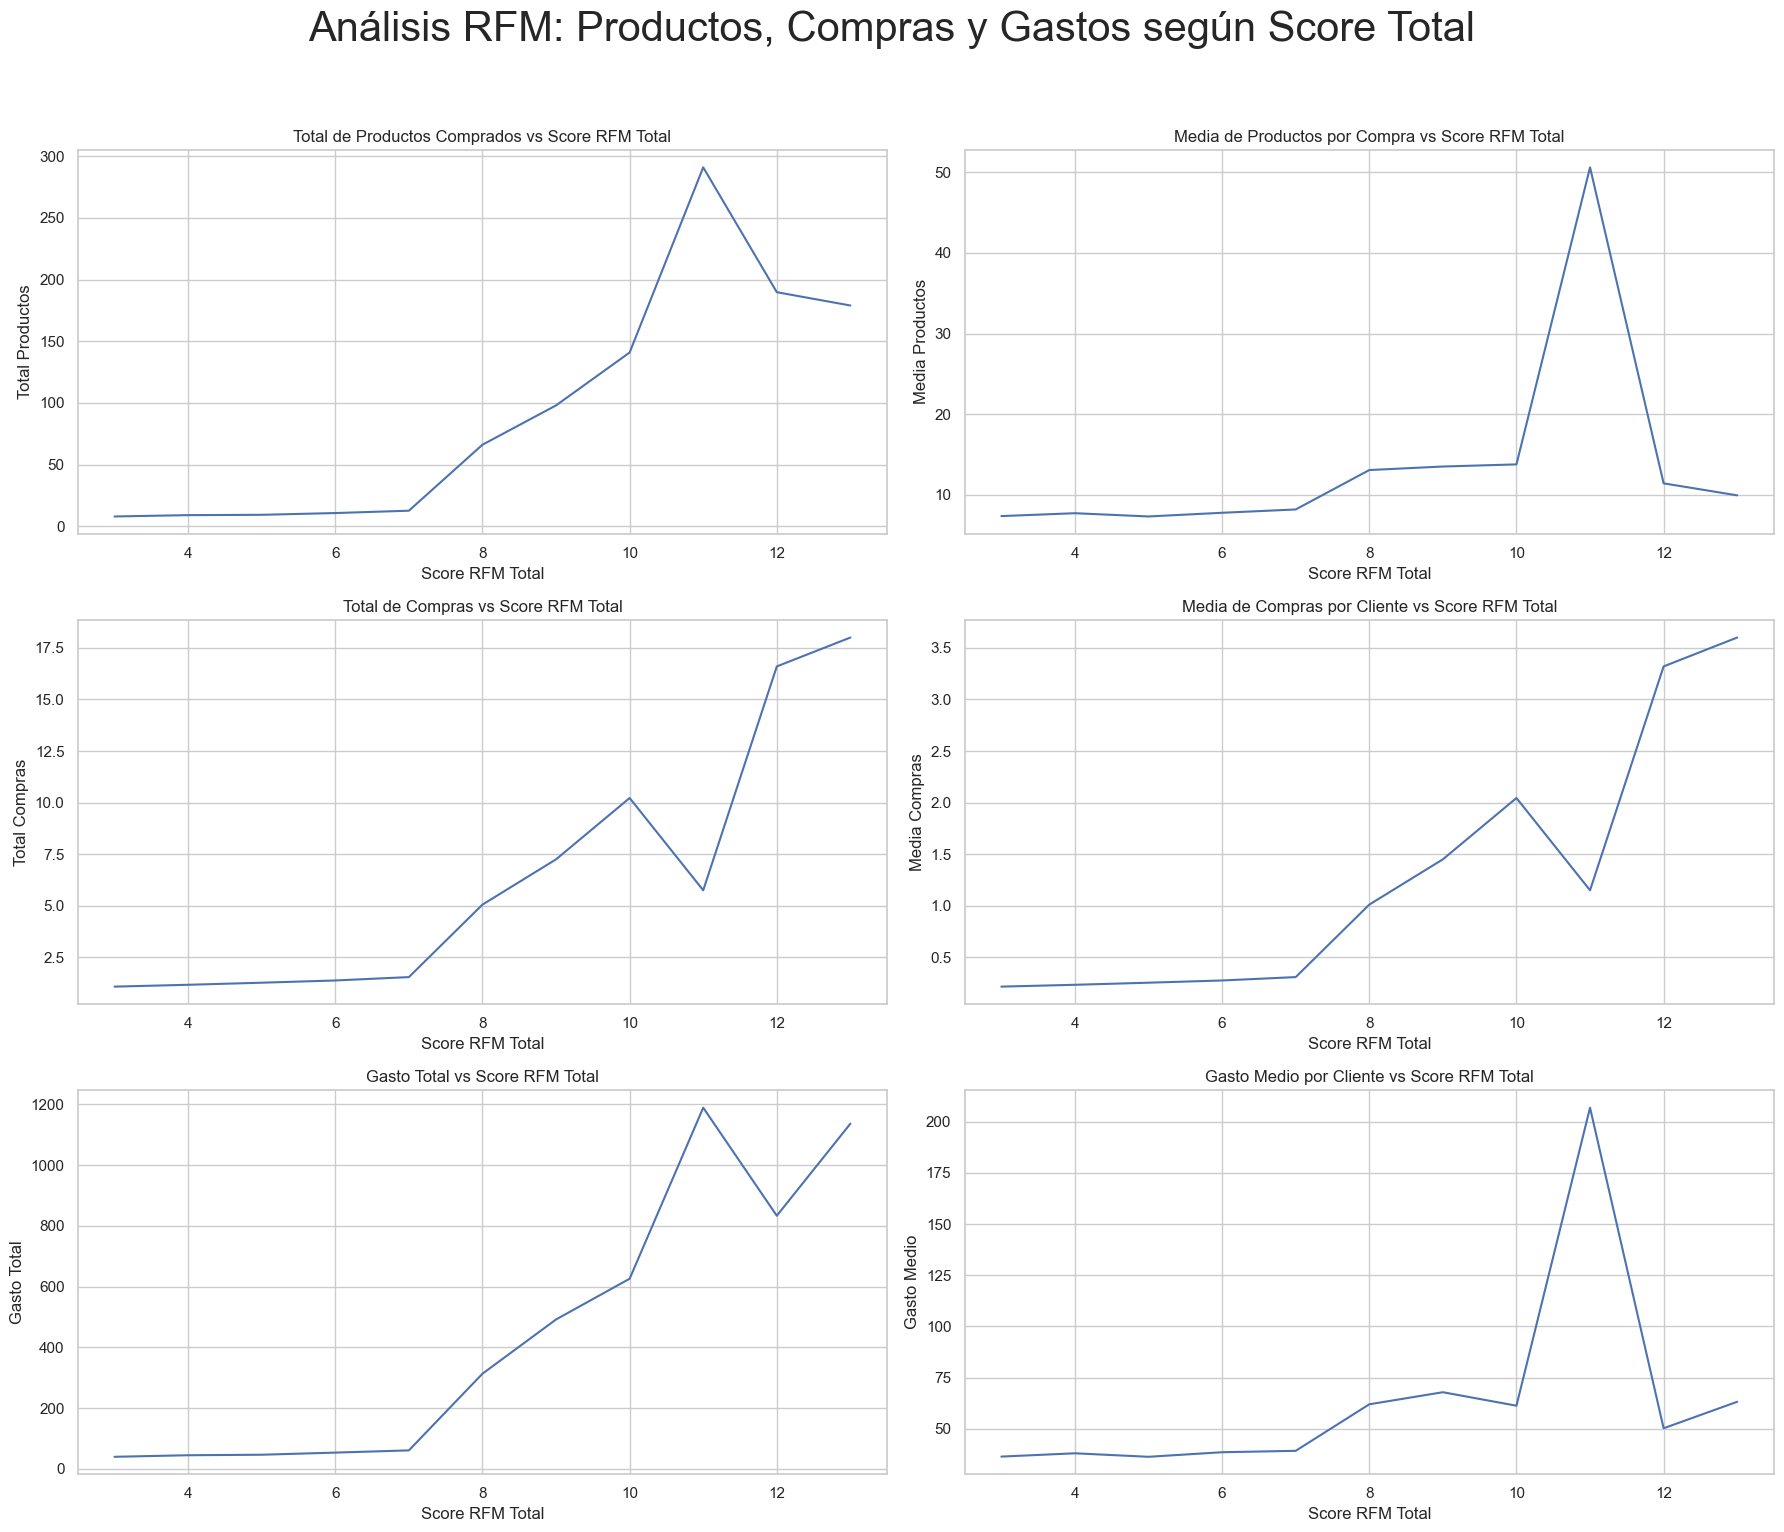

In [44]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(3, 2, figsize=(18, 15))  # 3 filas, 2 columnas

# Fila 1: PRODUCTOS COMPRADOS
sns.lineplot(data=RFM_v, x='value', y='productos_tot_num', ax=ax[0, 0])
ax[0, 0].set_title("Total de Productos Comprados vs Score RFM Total")
ax[0, 0].set_xlabel("Score RFM Total")
ax[0, 0].set_ylabel("Total Productos")

sns.lineplot(data=RFM_v, x='value', y='productos_por_compra', ax=ax[0, 1])
ax[0, 1].set_title("Media de Productos por Compra vs Score RFM Total")
ax[0, 1].set_xlabel("Score RFM Total")
ax[0, 1].set_ylabel("Media Productos")

# Fila 2: NÚMERO DE COMPRAS
sns.lineplot(data=RFM_v, x='value', y='compras_tot_num', ax=ax[1, 0])
ax[1, 0].set_title("Total de Compras vs Score RFM Total")
ax[1, 0].set_xlabel("Score RFM Total")
ax[1, 0].set_ylabel("Total Compras")

sns.lineplot(data=RFM_v, x='value', y='compras_med_mes _num', ax=ax[1, 1])
ax[1, 1].set_title("Media de Compras por Cliente vs Score RFM Total")
ax[1, 1].set_xlabel("Score RFM Total")
ax[1, 1].set_ylabel("Media Compras")

# Fila 3: GASTOS
sns.lineplot(data=RFM_v, x='value', y='gasto_tot', ax=ax[2, 0])
ax[2, 0].set_title("Gasto Total vs Score RFM Total")
ax[2, 0].set_xlabel("Score RFM Total")
ax[2, 0].set_ylabel("Gasto Total")

sns.lineplot(data=RFM_v, x='value', y='gasto_medio', ax=ax[2, 1])
ax[2, 1].set_title("Gasto Medio por Cliente vs Score RFM Total")
ax[2, 1].set_xlabel("Score RFM Total")
ax[2, 1].set_ylabel("Gasto Medio")

# Título general
plt.suptitle("Análisis RFM: Productos, Compras y Gastos según Score Total", fontsize=30, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

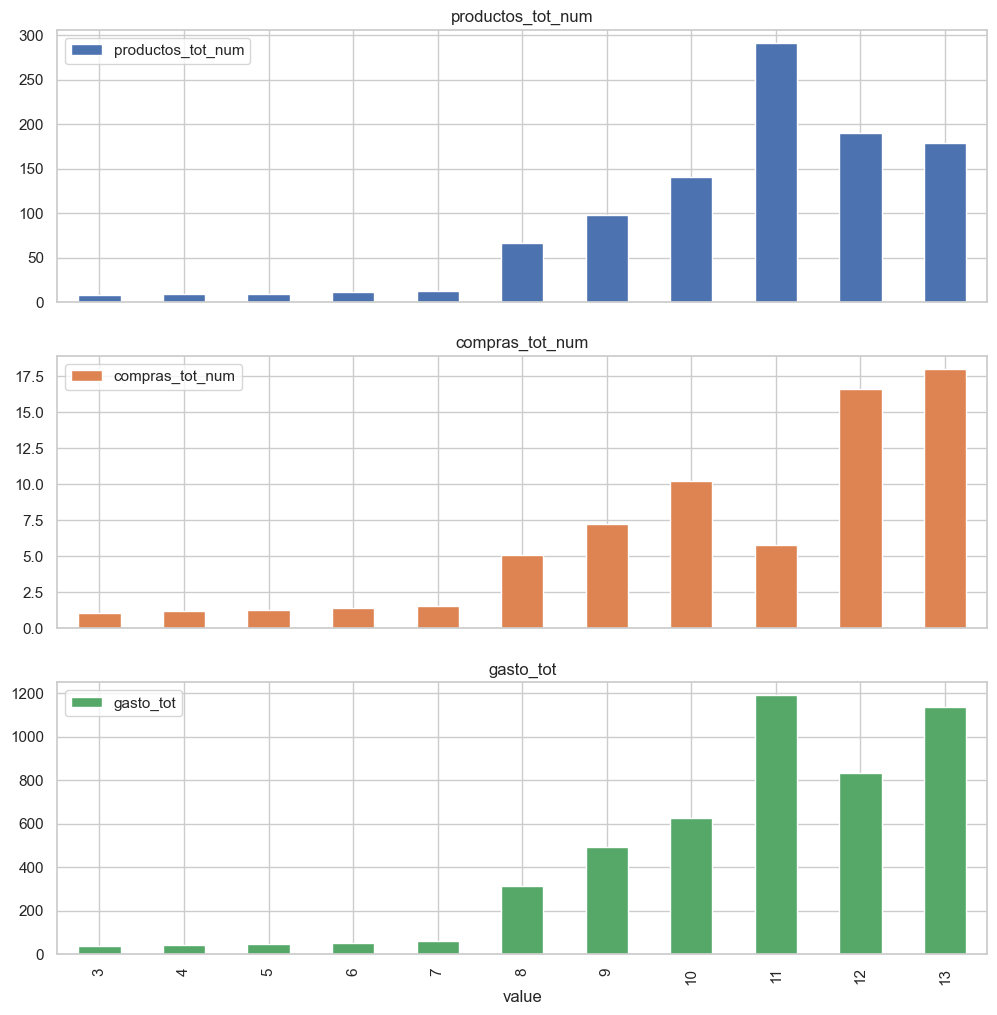

In [45]:
minicubo[minicubo.variable == 'valor'].set_index('value').plot.bar(subplots = True, figsize=(12,12))
plt.show()

<U>**Conclusiones</U>**

* Los segmentos 4 a 7 concentran el 75% de la facturacion y el 80% de los usuarios.  

* La clientela de la empresa puede agruparse en dos categorias:

    - Particulares - Ocasionales: Grupos 3 a 7

        - Constrituyen el core del negocio.

        - Volumen de compra (numero de productos) bajo, ticket bajo y compra ocasional (una unica compra).

    - Profesionales - Grupos 8 1 13

        - Por el numero de productos adquiridos, frecuencia de compra y ticket total, son o bien centros de belleza que se aprovisionan en el e-commerce, o bien resellers locales. Ese elevado consumo excede el de un particular.

### 3.2.2 Capa RFM

#### 3.2.2.1 Capa Recencia

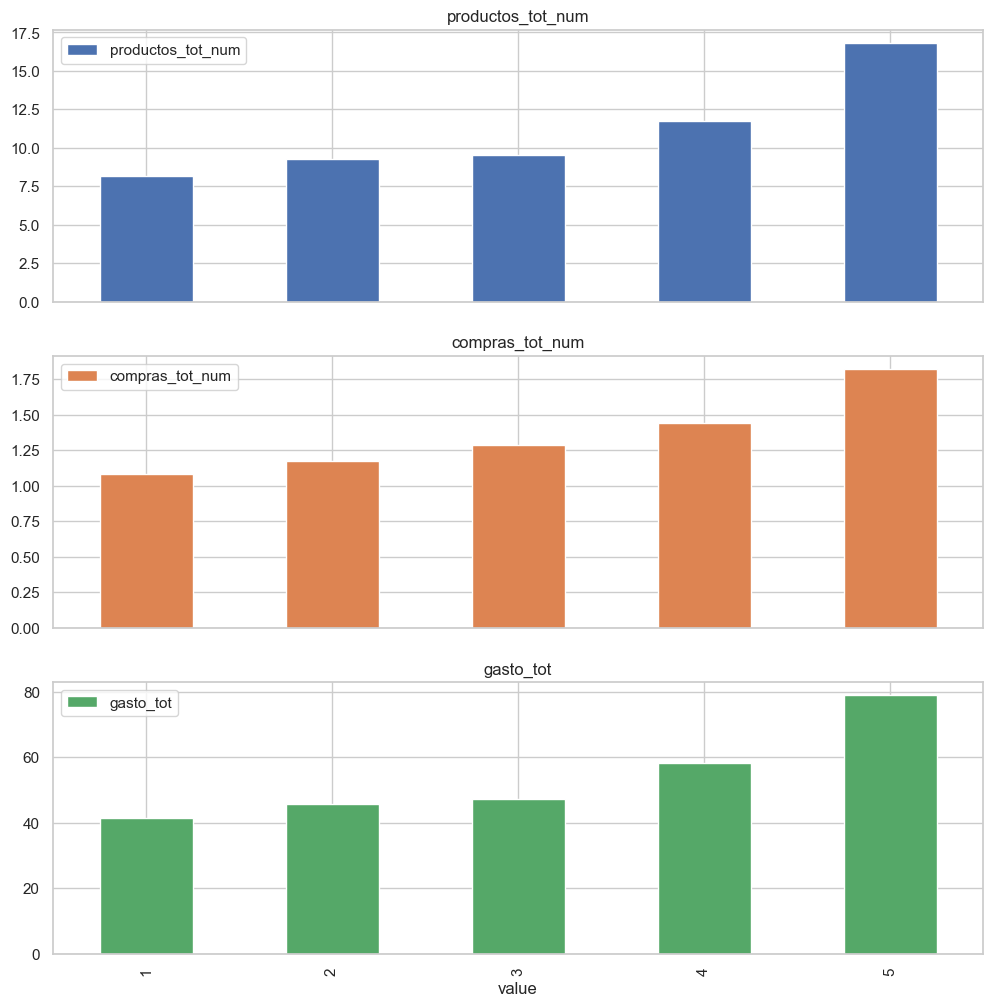

In [46]:
minicubo[minicubo.variable == 'R'].set_index('value').plot.bar(subplots = True, figsize=(12,12))
plt.show()

#### 3.2.2.2 Capa Frecuencia

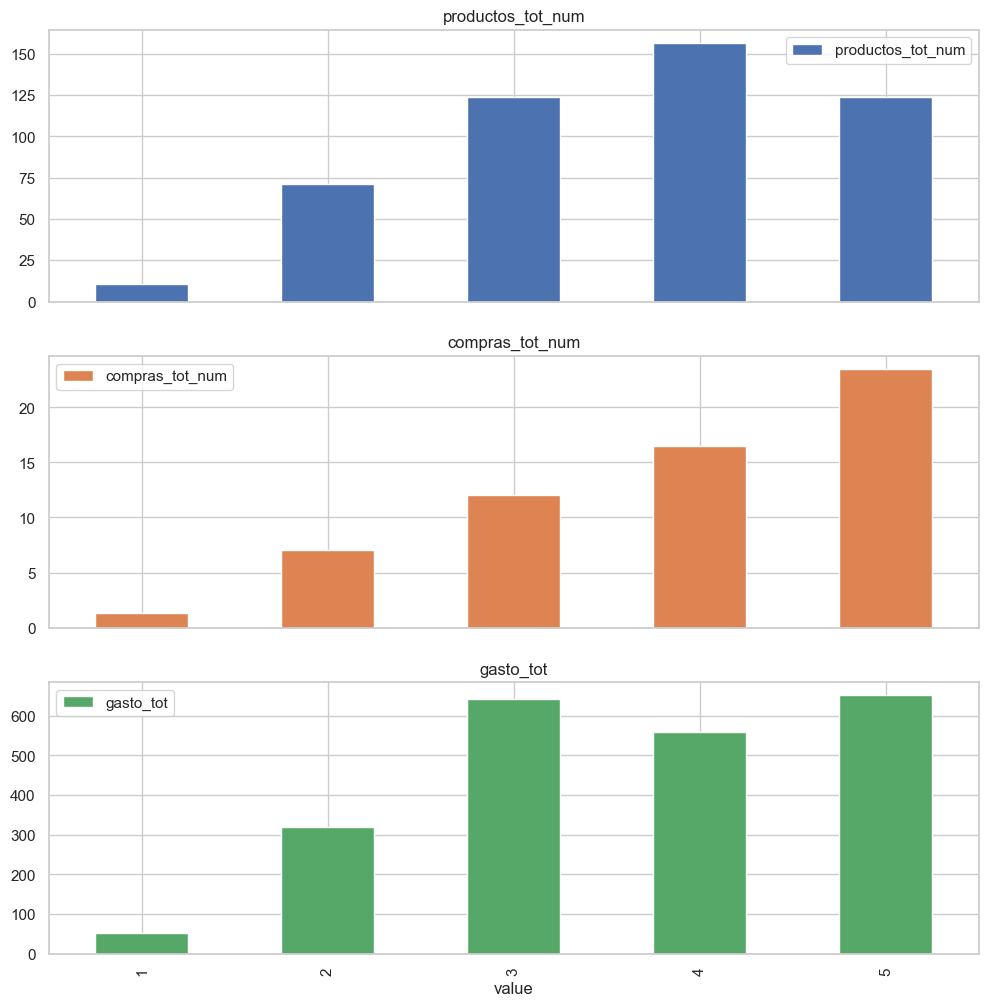

In [47]:
minicubo[minicubo.variable == 'F'].set_index('value').plot.bar(subplots = True, figsize=(12,12))
plt.show()

#### 3.2.2.3 Capa Monetary

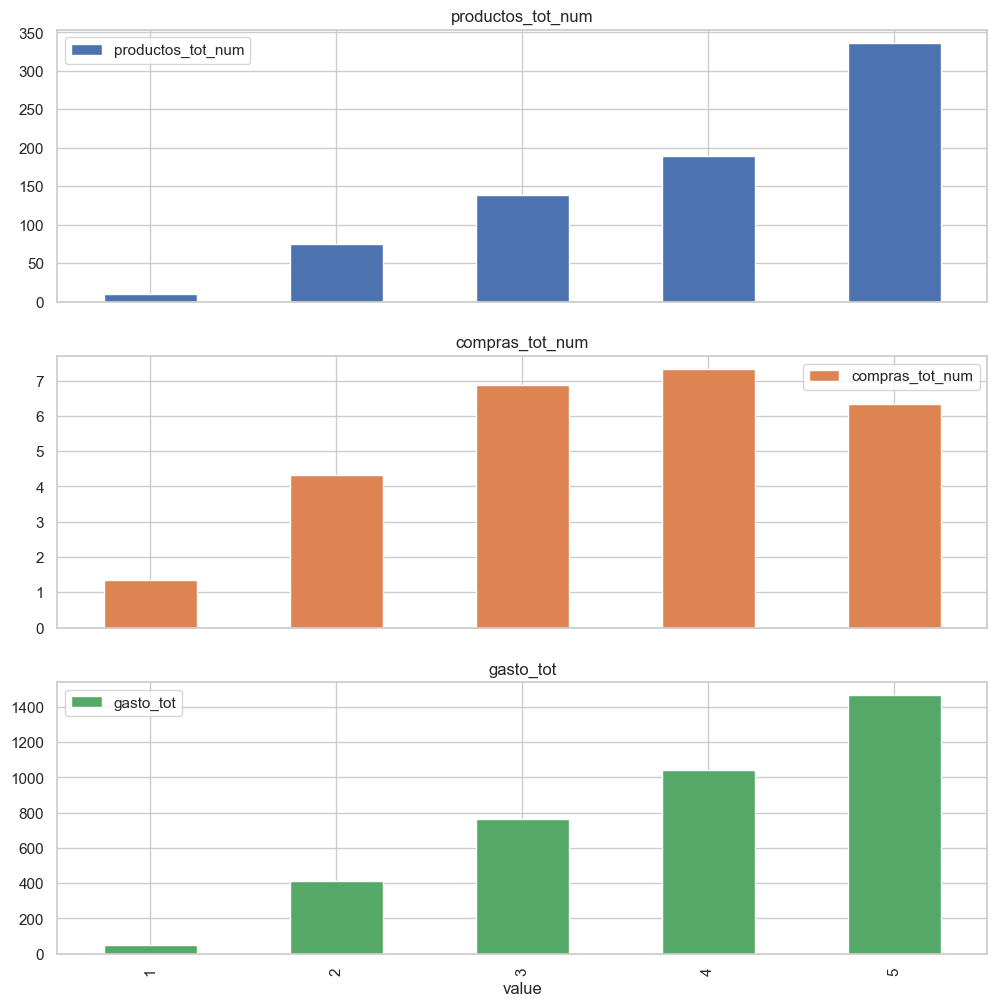

In [48]:
minicubo[minicubo.variable == 'M'].set_index('value').plot.bar(subplots = True, figsize=(12,12))
plt.show()

#### 3.2.2.4 Capa Integrada RFM

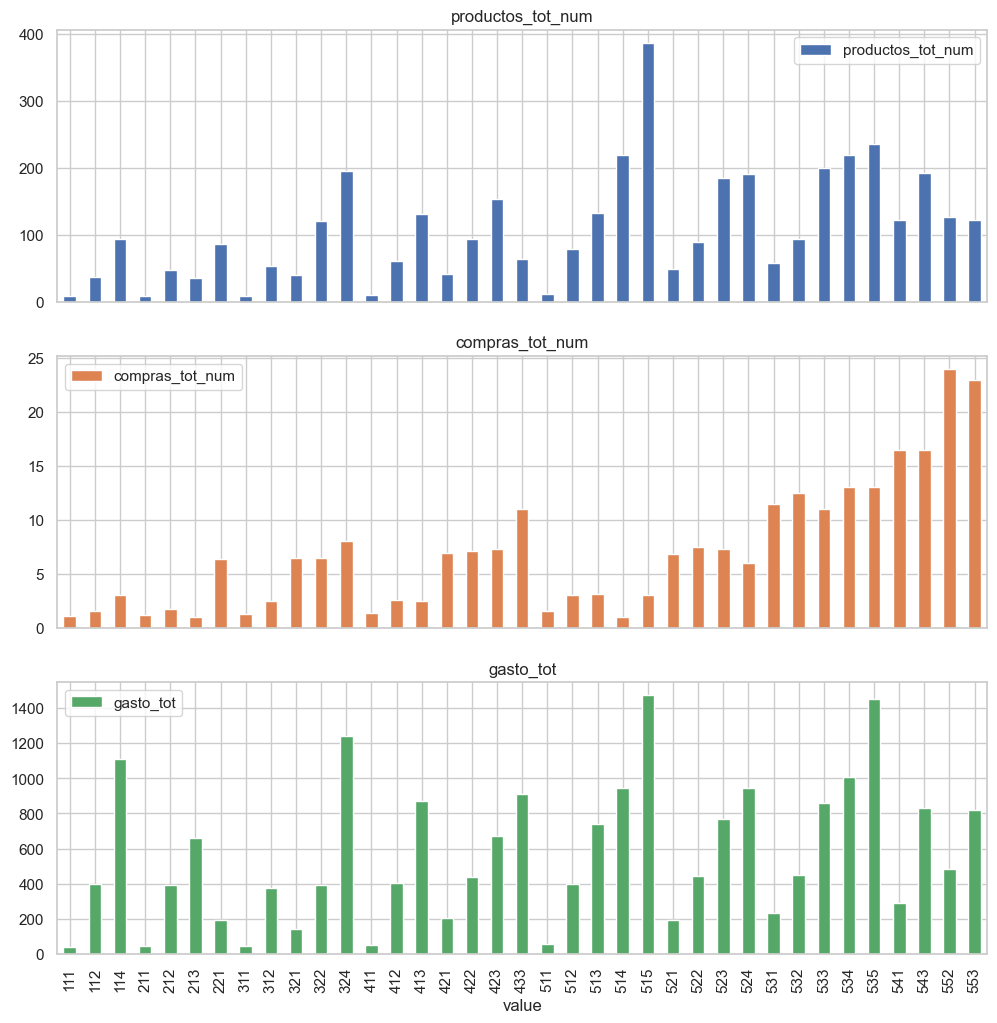

In [49]:
minicubo[minicubo.variable == 'RFM'].set_index('value').plot.bar(subplots = True, figsize=(12,12))
plt.show()

**<U>SEGMENTACION RFM</U>**

**<U>RFM 3–7 → Clientes Ocasionales</U>**

- **Frecuencia mensual:** entre 0.22 y 0.31 → *1–2 compras en 5 meses*
  
- **Proporción:** Son la mayoría (*92.9%*), pero compran solo una vez.

- **Facturación:** Aportan el *86.5%* de la facturación, pero lo hacen por **volumen**, no por **recurrencia**.

- El grupo value 6 es el más equilibrado: aporta el 19.1% de facturación con 2.2K usuarios.

- El value 7, aunque aún ocasionales, representa un 25.7% de la facturación. Este grupo tiene una frecuencia ligeramente mayor y puede ser el más rentable para campañas de "segunda compra".

- El salto de VALUE 7 a VALUE 8 (frecuencia 0.31 → 1.01) marca el paso de clientes transaccionales a clientes leales o VIPs.


   **Insight:**  
    - El core del negocio se basa en compradores que compran una unica vez.
    - Activar una segunda compra implica grandes efectos en la facturacion.

**<U>RFM 8–13 → Clientes Frecuentes / Habituales</U>**

- **Frecuencia mensual:** de *1.01 hasta 3.6 compras/mes*
- **Proporción:** Solo el *2%* de los usuarios, pero con comportamiento radicalmente distinto:
  
  - Compran entre *5 y 18 veces* en el periodo.

  - Gastan entre *275 € y más de 1.100 €*.

    **Insight:**  
  - Estos son los **clientes estratégicos para el LTV**. El modelo de negocio debería diseñar una ruta para **llevar clientes de RFM 3–7 a este grupo**.
 
  - Hay un punto de inflexión entre VALUE 7 y 8, que debería usarse como umbral para estrategias de upgrade o nurturing de clientes.

**<U> Grupo 1: NUCLEO DEL NEGOCIO: Grupos 111, 211, 311, 411 y 511. 80% facturacion total.</U>**

    -CARACTERISTICAS

        - Unicamente cambia el valor de recencia, lo reciente o lejana que sea la compra.

        - El resto de parametros son identicos:

            - 0.3 compras/mes.

            - Ticket medio 35-37 euros

            - Clientes ocasionales, solamente compran una vez.
 
    - ESTRATEGIAS

        - 1 Activar segunda compra.
        
            - Herramientas: email personalizado
         
            - Regalo en segunda compra.
         
            - Remarketing en redes.
         

        - 2 Aumentar el ticket medio.

            - Cross-sell dinámico en checkout ("Completa tu rutina").
        
            - Bundles inteligentes de productos complementarios.
        
            - Promoción de formatos grandes.

        - 3. Aumentar Frecuencia (+60%)
        
            - Ofrecer suscripción de reposición.
        
            - Lanzamientos mensuales de novedades.
        
            - Acceso anticipado a nuevos productos (Club VIP).

**<U>Grupo 2: CLIENTES FRECUENTES DE MEDIO GASTO (RFM 8–13)</U>**

Grupos involucrados: 522, 523, 524, 531
* Características:

    Frecuencia: Entre 1.01 y 3.6 compras/mes (5–18 compras en el periodo).

    Ticket medio: Entre 226 € y 484 €.

    Comportamiento: 
    
        - Son clientes recurrentes, con un gasto medio más alto, pero no son tan frecuentes como el grupo de alto gasto.

        - RFM: Recencia, frecuencia y gasto medio relativamente homogéneo.

        - Aportación a la facturación: Aproximadamente el 15% de la facturación total.

* Estrategias clave:

   - Fidelización de alto valor:

        Ofrecer acceso exclusivo a productos, descuentos especiales y promociones VIP.

    - Cross-sell y Upsell:

        Recomendaciones de productos complementarios basadas en el historial de compras.

    - Retargeting y personalización:

        Anuncios personalizados de productos premium.

**<U>Grupo 3: CLIENTES HABITUALES DE ALTO GASTO (RFM 14–20)</u>**

Grupos involucrados: 534, 535, 541, 543, 552, 553

* Características:

    - Frecuencia: Entre 5 y 13 compras/mes (altamente recurrentes).

    - Ticket medio: Desde 490 € hasta más de 1,100 €.

    - Comportamiento: Compran frecuentemente, con un ticket medio elevado. Son clientes de alto valor que realizan compras regulares.

    - Por cantidad de compras tanto en cantidad, variedad y frecuencia 

    - RFM: Recencia muy alta, frecuencia elevada y un gasto significativo.

    - Aportación a la facturación: Aproximadamente el 5% de la facturación total (aunque su gasto individual es alto).

* Estrategias clave:

    - Maximizar LTV:
    
        * Programas VIP exclusivos con beneficios especiales (envíos gratis, descuentos personalizados).
    
        * Acceso anticipado a productos y ediciones limitadas.
    
    - Cross-sell y Upsell:
    
        * Aprovechar el alto gasto para promover productos complementarios o versiones premium.
    
    - Retargeting avanzado:
    
        * Anuncios dirigidos a productos exclusivos basados en su historial de compras.

    - En total son 8 clientes en los que hay que fomentar el trato personal.

# 4 Analisis de Producto

## 4.1 Analisis producto-evento

In [50]:
prod = df.groupby(['producto','evento']).size()
prod

producto  evento          
3752      view                 10
3762      cart                127
          purchase             28
          remove_from_cart     59
          view                258
                             ... 
5932538   view                  1
5932540   cart                  1
          view                  2
5932578   view                  1
5932585   view                  2
Length: 137073, dtype: int64

In [51]:
prod = prod.unstack(level = 1 ).fillna(0)
prod

evento,cart,purchase,remove_from_cart,view
producto,,,,
3752,0.00,0.00,0.00,10.00
3762,127.00,28.00,59.00,258.00
3763,10.00,2.00,2.00,51.00
3771,0.00,0.00,0.00,9.00
3774,26.00,7.00,13.00,76.00
...,...,...,...,...
5932537,1.00,0.00,0.00,1.00
5932538,0.00,0.00,0.00,1.00
5932540,1.00,0.00,0.00,2.00


In [52]:
maestro_precios = df.groupby('producto', as_index = False).precio.mean()
maestro_precios

,producto,precio
0,3752,15.71
1,3762,19.29
2,3763,16.00
3,3771,15.08
4,3774,15.92
...,...,...
45324,5932537,1.43
45325,5932538,1.43
45326,5932540,1.43
45327,5932578,6.02


In [53]:
prod = pd.merge(left = prod, right = maestro_precios, how = 'left', on = 'producto')
prod

,producto,cart,purchase,remove_from_cart,view,precio
0,3752,0.00,0.00,0.00,10.00,15.71
1,3762,127.00,28.00,59.00,258.00,19.29
2,3763,10.00,2.00,2.00,51.00,16.00
3,3771,0.00,0.00,0.00,9.00,15.08
4,3774,26.00,7.00,13.00,76.00,15.92
...,...,...,...,...,...,...
45324,5932537,1.00,0.00,0.00,1.00,1.43
45325,5932538,0.00,0.00,0.00,1.00,1.43
45326,5932540,1.00,0.00,0.00,2.00,1.43
45327,5932578,0.00,0.00,0.00,1.00,6.02


In [54]:
prod = prod[['producto','view','cart','remove_from_cart','purchase','precio']]
prod

,producto,view,cart,remove_from_cart,purchase,precio
0,3752,10.00,0.00,0.00,0.00,15.71
1,3762,258.00,127.00,59.00,28.00,19.29
2,3763,51.00,10.00,2.00,2.00,16.00
3,3771,9.00,0.00,0.00,0.00,15.08
4,3774,76.00,26.00,13.00,7.00,15.92
...,...,...,...,...,...,...
45324,5932537,1.00,1.00,0.00,0.00,1.43
45325,5932538,1.00,0.00,0.00,0.00,1.43
45326,5932540,2.00,1.00,0.00,0.00,1.43
45327,5932578,1.00,0.00,0.00,0.00,6.02


In [55]:
# PRODUCTOS SIN VENTAS
sin_ventas = prod[prod.purchase == 0]
sin_ventas

,producto,view,cart,remove_from_cart,purchase,precio
0,3752,10.00,0.00,0.00,0.00,15.71
3,3771,9.00,0.00,0.00,0.00,15.08
6,3790,10.00,0.00,0.00,0.00,7.92
8,3809,2.00,0.00,0.00,0.00,12.54
9,3812,1.00,0.00,0.00,0.00,12.54
...,...,...,...,...,...,...
45324,5932537,1.00,1.00,0.00,0.00,1.43
45325,5932538,1.00,0.00,0.00,0.00,1.43
45326,5932540,2.00,1.00,0.00,0.00,1.43
45327,5932578,1.00,0.00,0.00,0.00,6.02


In [56]:
sin_ventas.describe()

,producto,view,cart,remove_from_cart,purchase,precio
count,21852.00,21852.00,21852.00,21852.00,21852.00,21852.00
mean,5614141.19,5.74,2.10,1.92,0.00,9.90
std,1101470.95,10.52,2.79,3.12,0.00,15.11
min,3752.00,0.00,0.00,0.00,0.00,0.10
25%,5786769.75,1.00,0.00,0.00,0.00,3.49
50%,5845261.00,3.00,1.00,1.00,0.00,5.56
75%,5884464.25,7.00,3.00,3.00,0.00,10.32
max,5932585.00,380.00,37.00,63.00,0.00,307.60


In [57]:
# Aislamos en una lista los codigos de los productos sin ventas
sin_ventas_list = sin_ventas.producto.to_list()
len(sin_ventas_list)

21852

In [58]:
# Comprobacion de que no hay productos repetidos
sin_ventas_list_unique = set (sin_ventas_list )
len(sin_ventas_list_unique )

21852

In [59]:
# Aislo en una lista los codigos de los productos sin ventas
sin_ventas_list = sin_ventas.producto.to_list()

# Selecciono los registros del  df original para tener el registro completo 
sin_ventas_df = df[~df['producto'].isin(sin_ventas_list)]
sin_ventas_df

,usuario,sesion,categoria,evento,producto,precio,categoria_cod,marca,date,año,mes,dia,hora,minuto,segundo,festivo,black_friday,san_valentin
fecha,,,,,,,,,,,,,,,,,,
2019-10-01 00:01:46,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,1487580005092295511,view,5843665,9.44,None,f.o.x,2019-10-01,2019,10,1,0,1,46,0,0,0
2019-10-01 00:01:55,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,1487580013069861041,cart,5868461,3.57,None,italwax,2019-10-01,2019,10,1,0,1,55,0,0,0
2019-10-01 00:02:50,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,1487580006300255120,view,5877456,122.22,None,jessnail,2019-10-01,2019,10,1,0,2,50,0,0,0
2019-10-01 00:03:41,555448072,b5f72ceb-0730-44de-a932-d16db62390df,1487580013749338323,view,5649270,6.19,None,concept,2019-10-01,2019,10,1,0,3,41,0,0,0
2019-10-01 00:04:42,485644718,4afc450a-3459-46db-89c0-84b73aa0fd64,1487580008145748965,view,5550686,1.11,None,None,2019-10-01,2019,10,1,0,4,42,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:58:49,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815662,0.92,None,None,2020-02-29,2020,2,29,23,58,49,0,0,0
2020-02-29 23:58:57,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,view,5815665,0.59,None,None,2020-02-29,2020,2,29,23,58,57,0,0,0
2020-02-29 23:59:05,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815665,0.59,None,None,2020-02-29,2020,2,29,23,59,5,0,0,0


In [60]:
none_code_list = none_code.producto.to_list()
len(none_code_list)

2040133

In [61]:
none_code_list_unique = list(set(none_code_list ))
len(none_code_list_unique)

44836

In [62]:
comunes = len(set(sin_ventas_list_unique)& set(none_code_list_unique))
no_comunes = len(set(sin_ventas_list_unique)^ set(none_code_list_unique))

print(f"Tenemos: {len(none_code_list_unique)} articulos sin codigo de categoria:" )
print(f"Tenemos: {comunes} articulos sin ventas y sin codigo de categoria ")
print(f"Tenemos: {no_comunes} articulos con ventas pero sin codigo de categoria ")

Tenemos: 44836 articulos sin codigo de categoria:
Tenemos: 21620 articulos sin ventas y sin codigo de categoria 
Tenemos: 23448 articulos con ventas pero sin codigo de categoria 


**<u>INSIGHT #8</U>**

* Casi la mitad de los productos del catalogo, no tienen venta en el periodo de estudio.

* Son "invisibles" ni tienen visionados ni entran en el carrito.

* La mitad se encuentran dentro del grupo de los que carecen de categoria_cod.

## 4.2 Analisis de elasticidad-precio

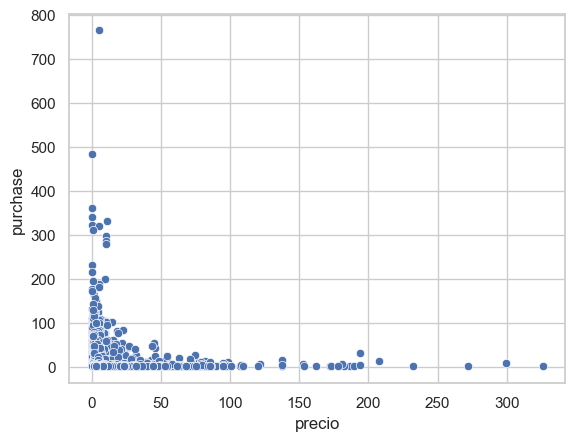

In [63]:
sns.scatterplot(data = prod[prod.purchase >0], x = 'precio', y = 'purchase');

In [64]:
# Sobre los 50 euros hay una bajada de frecuencia muy notable.

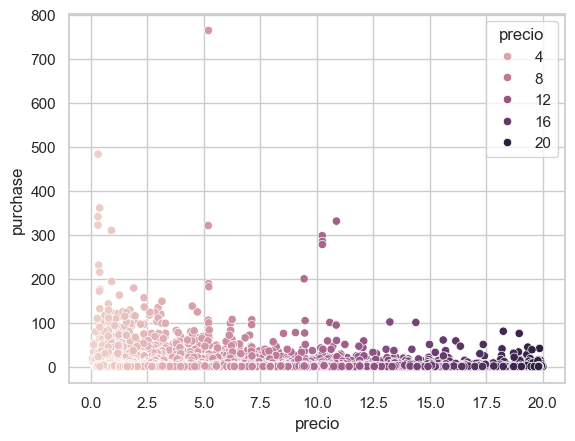

In [65]:
sns.scatterplot(data = prod[(prod.purchase >0) & (prod.precio <=20)], x = 'precio', y = 'purchase', hue = 'precio');

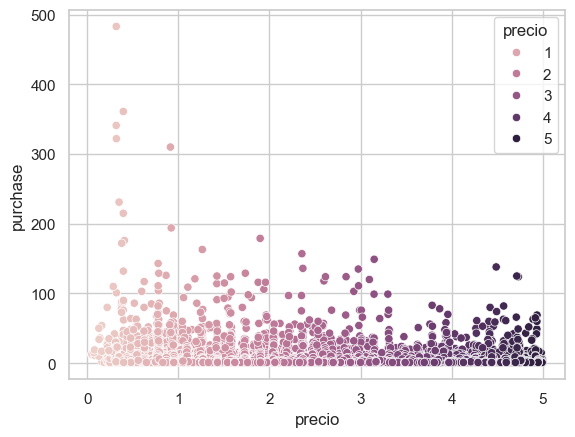

In [66]:
sns.scatterplot(data = prod[(prod.purchase >0) & (prod.precio <=5)], x = 'precio', y = 'purchase', hue = 'precio');

In [67]:
# Sugerencia de venta cruzada, vende productos de <=5 hay que potenciar vender productos complementarios
# ejemplo maquinillas y recambios de cuchillos.

# 5 Abandono de Carrito

In [68]:
prod.insert(loc = 4, column = 'remove_from_cart_porc', value = prod.remove_from_cart/ prod.cart * 100)

In [69]:
prod

,producto,view,cart,remove_from_cart,remove_from_cart_porc,purchase,precio
0,3752,10.00,0.00,0.00,NaN,0.00,15.71
1,3762,258.00,127.00,59.00,46.46,28.00,19.29
2,3763,51.00,10.00,2.00,20.00,2.00,16.00
3,3771,9.00,0.00,0.00,NaN,0.00,15.08
4,3774,76.00,26.00,13.00,50.00,7.00,15.92
...,...,...,...,...,...,...,...
45324,5932537,1.00,1.00,0.00,0.00,0.00,1.43
45325,5932538,1.00,0.00,0.00,NaN,0.00,1.43
45326,5932540,2.00,1.00,0.00,0.00,0.00,1.43
45327,5932578,1.00,0.00,0.00,NaN,0.00,6.02


In [70]:
prod.loc[prod.cart >30].sort_values('remove_from_cart_porc', ascending = False)[0:30]

,producto,view,cart,remove_from_cart,remove_from_cart_porc,purchase,precio
14331,5797131,26.00,38.00,136.00,357.89,7.00,4.43
37939,5893670,36.00,35.00,109.00,311.43,3.00,4.90
29130,5858481,41.00,31.00,64.00,206.45,7.00,4.55
16659,5809346,8.00,34.00,62.00,182.35,7.00,0.78
26121,5848412,34.00,37.00,66.00,178.38,12.00,0.79
37946,5893677,64.00,41.00,70.00,170.73,10.00,4.69
8417,5731470,39.00,34.00,58.00,170.59,10.00,6.32
3217,5635096,32.00,32.00,52.00,162.50,11.00,4.42
3244,5635127,41.00,32.00,52.00,162.50,10.00,4.43
21618,5830537,35.00,37.00,60.00,162.16,8.00,1.73


# 6 Productos mas vistos

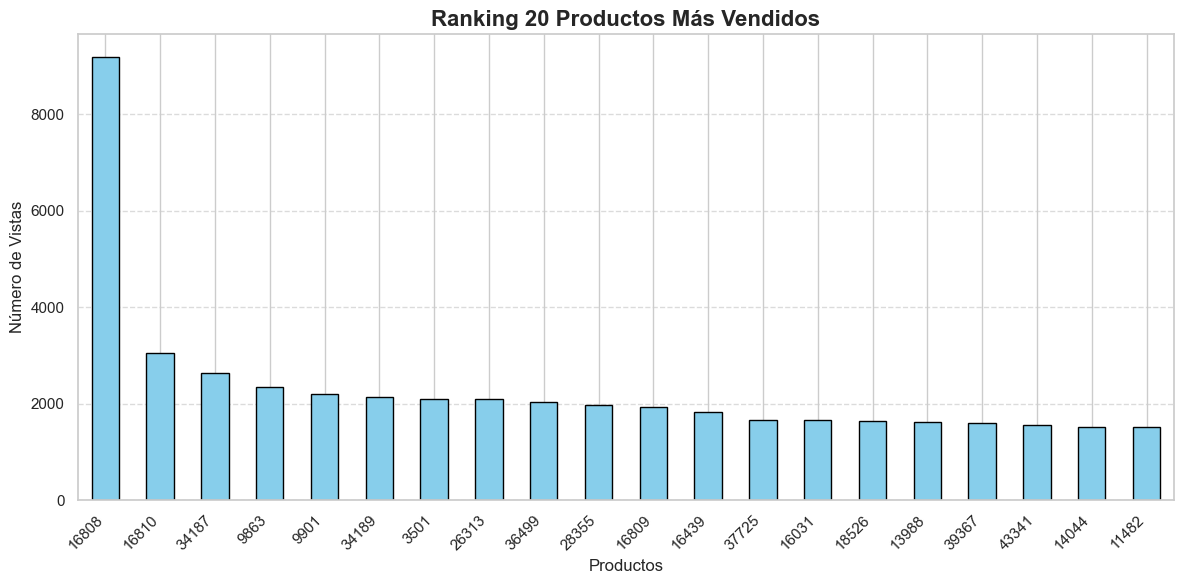

In [84]:
# Ordenar y seleccionar los 20 productos más vistos
top_20 = prod.view.sort_values(ascending=False)[0:20]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Tamaño más grande y legible
top_20.plot.bar(color='skyblue', edgecolor='black')

# Embellecer el gráfico
plt.title('Ranking 20 Productos Más Vendidos', fontsize=16, fontweight='bold')
plt.ylabel('Número de Vistas', fontsize=12)
plt.xlabel('Productos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Productos visualizacion Vs Compra

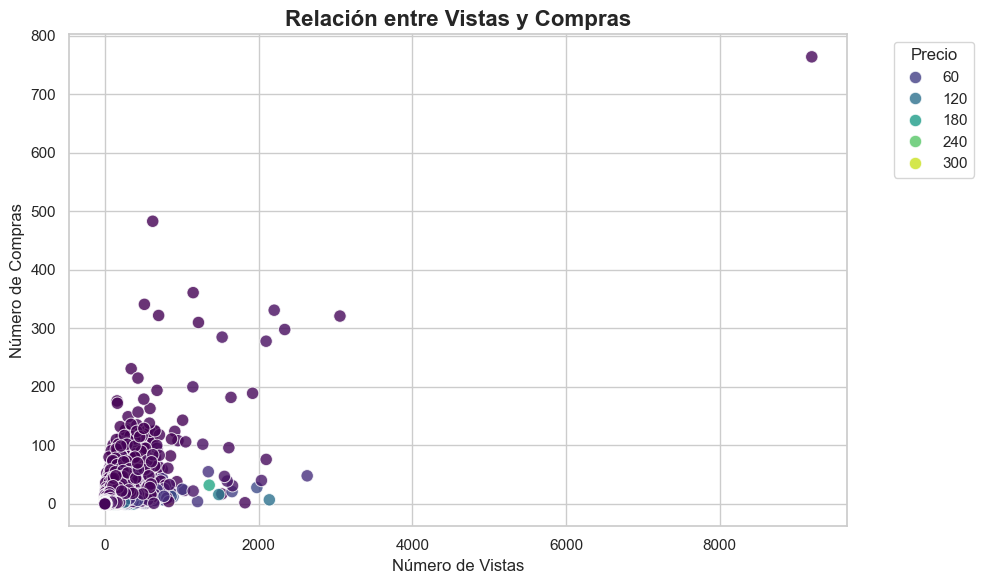

In [88]:
# Estilo general
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=prod,
    x='view',
    y='purchase',
    hue='precio',
    palette='viridis',
    alpha=0.8,
    edgecolor='w',
    s=80  # tamaño de los puntos
)

# Título y etiquetas
plt.title('Relación entre Vistas y Compras', fontsize=16, fontweight='bold')
plt.xlabel('Número de Vistas', fontsize=12)
plt.ylabel('Número de Compras', fontsize=12)

# Leyenda
plt.legend(title='Precio', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuste general
plt.tight_layout()
plt.show()

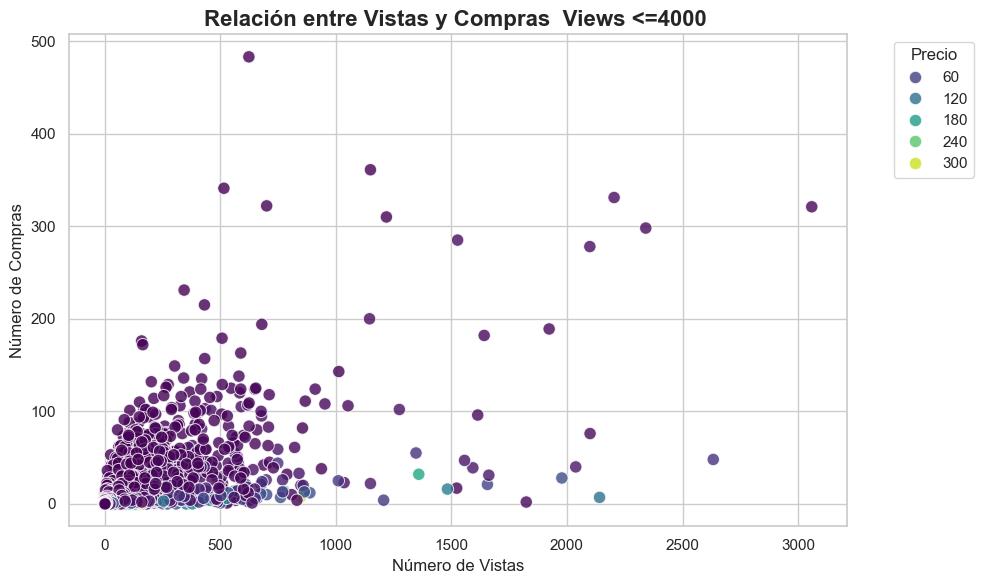

In [89]:
# Estilo general
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=prod.loc[prod.view <= 4000],
    x='view',
    y='purchase',
    hue='precio',
    palette='viridis',
    alpha=0.8,
    edgecolor='w',
    s=80  # tamaño de los puntos
)

# Título y etiquetas
plt.title('Relación entre Vistas y Compras  Views <=4000 ', fontsize=16, fontweight='bold')
plt.xlabel('Número de Vistas', fontsize=12)
plt.ylabel('Número de Compras', fontsize=12)

# Leyenda
plt.legend(title='Precio', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuste general
plt.tight_layout()
plt.show()

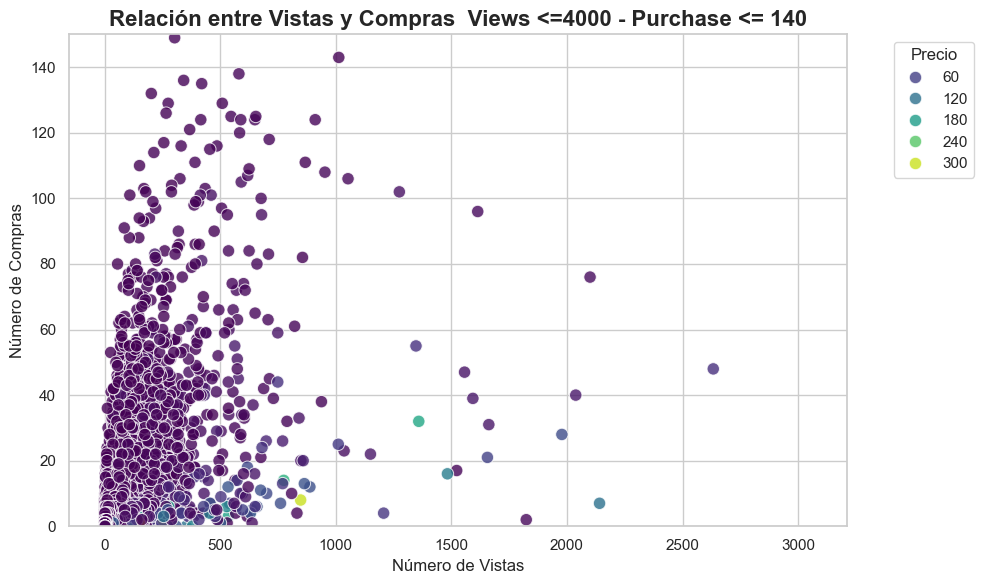

In [93]:
# Estilo general
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=prod.loc[prod.view <= 4000],
    x='view',
    y='purchase',
    hue='precio',
    palette='viridis',
    alpha=0.8,
    edgecolor='w',
    s=80  # tamaño de los puntos
)

# Título y etiquetas
plt.title('Relación entre Vistas y Compras  Views <=4000 - Purchase <= 140', fontsize=16, fontweight='bold')
plt.xlabel('Número de Vistas', fontsize=12)
plt.ylabel('Número de Compras', fontsize=12)
plt.ylim(0,150);

# Leyenda
plt.legend(title='Precio', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuste general
plt.tight_layout()
plt.show()

Nos centrariamos  >1500 hasta 80 purchase. ideas video 276 final

# Productos con mas abandono de carrito

In [96]:
df.evento.unique()

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

In [99]:
prod.columns

Index(['producto', 'view', 'cart', 'remove_from_cart', 'remove_from_cart_porc',
       'purchase', 'precio'],
      dtype='object')

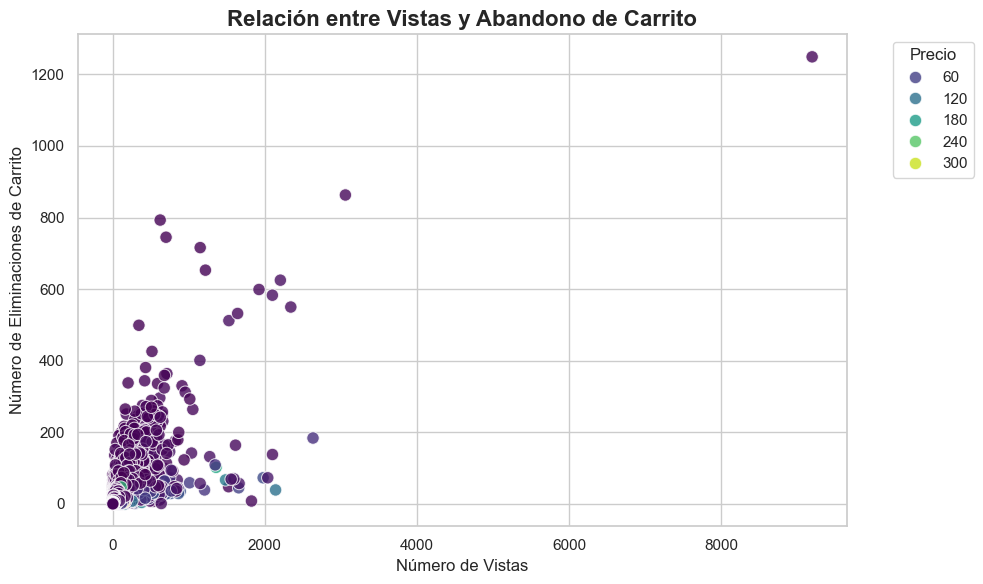

In [100]:
# Estilo general
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=prod,
    x='view',
    y='remove_from_cart',
    hue='precio',
    palette='viridis',
    alpha=0.8,
    edgecolor='w',
    s=80  # tamaño de los puntos
)

# Título y etiquetas
plt.title('Relación entre Vistas y Abandono de Carrito', fontsize=16, fontweight='bold')
plt.xlabel('Número de Vistas', fontsize=12)
plt.ylabel('Número de Eliminaciones de Carrito', fontsize=12)

# Leyenda
plt.legend(title='Precio', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajuste general
plt.tight_layout()
plt.show()

In [102]:
print(prod['remove_from_cart'].describe())
print(prod['remove_from_cart'].unique()[:10])  # Primeros 10 valores únicos


count          45329.00
mean               9.05
std               22.54
min                0.00
25%                0.00
50%                3.00
75%                9.00
max             1249.00
Name: remove_from_cart, dtype: float64
[ 0. 59.  2. 13. 11. 16.  6. 32. 18. 28.]


In [103]:
prod[['view', 'remove_from_cart']].sort_values(by='remove_from_cart', ascending=False).head(10)


,view,remove_from_cart
16808,9195.00,1249.00
16810,3059.00,863.00
28180,624.00,793.00
15395,701.00,745.00
6645,1150.00,716.00
18416,1219.00,653.00
9901,2204.00,625.00
16809,1923.00,599.00
26313,2099.00,583.00
9863,2341.00,550.00


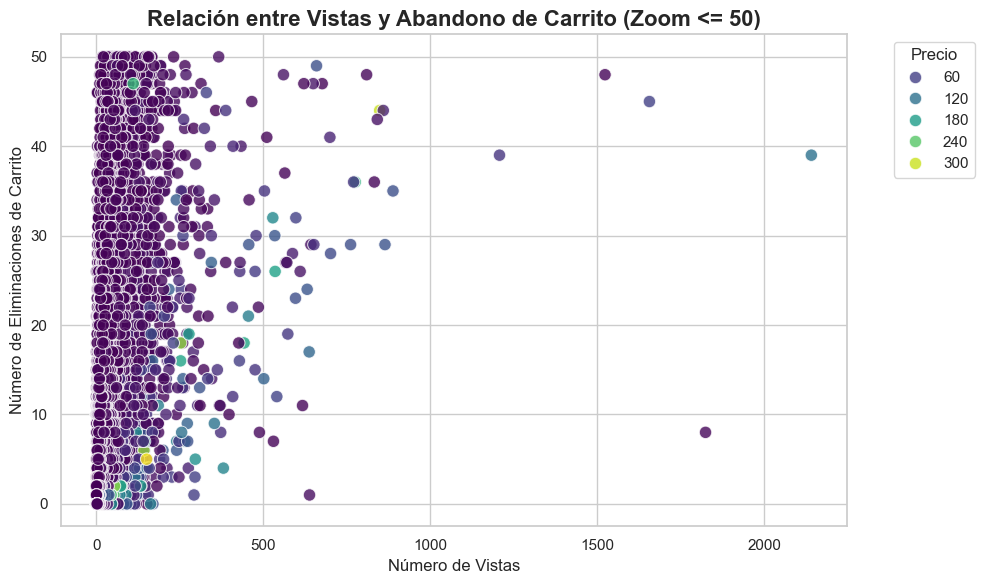

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos: remove_from_cart <= 50
prod_zoom = prod[prod['remove_from_cart'] <= 50]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=prod_zoom,
    x='view',
    y='remove_from_cart',
    hue='precio',
    palette='viridis',
    alpha=0.8,
    edgecolor='w',
    s=80
)

plt.title('Relación entre Vistas y Abandono de Carrito (Zoom <= 50)', fontsize=16, fontweight='bold')
plt.xlabel('Número de Vistas', fontsize=12)
plt.ylabel('Número de Eliminaciones de Carrito', fontsize=12)
plt.legend(title='Precio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 7 Sistemas de Recomendacion

Filtrado Colaborativo Item a Item

Kpi Total ventas.

**Vamos a hacer un filtrado de los 100 productos mas vendidos.**

## 7.1 Reduccion del df

In [75]:
mas_vendidos = prod.sort_values('purchase', ascending = False).producto[0:100]
mas_vendidos

16808    5809910
28180    5854897
6645     5700037
314         5304
9901     5751422
          ...   
22752    5835859
9733     5749149
9779     5749720
30397    5862564
22117    5833335
Name: producto, Length: 100, dtype: int64

In [76]:
temp = df.loc[df.producto.isin(mas_vendidos)]
temp

,usuario,sesion,categoria,evento,producto,precio,categoria_cod,marca,date,año,mes,dia,hora,minuto,segundo,festivo,black_friday,san_valentin
fecha,,,,,,,,,,,,,,,,,,
2019-10-01 00:26:49,536128518,a31f0991-645e-4472-a012-95eb2f814568,1487580006317032337,purchase,5815662,0.92,None,None,2019-10-01,2019,10,1,0,26,49,0,0,0
2019-10-01 00:46:20,555415545,b9cc1771-9062-4e08-a3ad-363314cd17d8,1602943681873052386,view,5809912,5.24,None,grattol,2019-10-01,2019,10,1,0,46,20,0,0,0
2019-10-01 00:48:13,555415545,b9cc1771-9062-4e08-a3ad-363314cd17d8,1602943681873052386,view,5816170,5.24,None,grattol,2019-10-01,2019,10,1,0,48,13,0,0,0
2019-10-01 00:52:39,555415545,b9cc1771-9062-4e08-a3ad-363314cd17d8,1487580005092295511,view,5815730,10.95,None,None,2019-10-01,2019,10,1,0,52,39,0,0,0
2019-10-01 01:33:26,555456891,b3239dc3-f107-4034-a507-4c41f646e38a,1487580005092295511,view,5849033,10.32,None,uno,2019-10-01,2019,10,1,1,33,26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:11:44,615102046,17b94398-0397-4c59-bc84-fe91dde0a8ec,1487580006509970331,cart,5793703,2.22,None,irisk,2020-02-29,2020,2,29,23,11,44,0,0,0
2020-02-29 23:12:40,615102046,17b94398-0397-4c59-bc84-fe91dde0a8ec,2195085255034011676,cart,5550302,1.21,None,None,2020-02-29,2020,2,29,23,12,40,0,0,0
2020-02-29 23:12:50,599909613,1c6c708d-135d-487b-afa9-4bbcfd28db4d,1602943681873052386,cart,5809911,5.24,None,grattol,2020-02-29,2020,2,29,23,12,50,0,0,0


## 7.2 Construimos matriz usuario-item

In [77]:
usuario_item = temp.loc[temp.evento == 'purchase'].groupby(['usuario', 'producto']).size().unstack(level = 1).fillna(0)
usuario_item

producto,4497,4600,4768,4938,4958,5013,5304,5526,5528034,5528035,...,5848909,5849033,5854812,5854897,5855332,5857007,5857360,5862564,5862943,5889300
usuario,,,,,,,,,,,,,,,,,,,,,
25392526,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50748978,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
74332980,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
80577370,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
88211255,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621646584,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
621788730,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
621925941,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## 7.3 Seleccion medida de distancia

Distancia Euclidea

In [78]:
from scipy import spatial

In [79]:
def recomendador (dataframe):

    def distancia(producto):
        return(dataframe.apply(lambda x: spatial.distance.euclidean(x,producto)))

    return (dataframe.apply(lambda x:distancia (x)))
        

In [80]:
item_item = recomendador(usuario_item)
item_item

producto,4497,4600,4768,4938,4958,5013,5304,5526,5528034,5528035,...,5848909,5849033,5854812,5854897,5855332,5857007,5857360,5862564,5862943,5889300
producto,,,,,,,,,,,,,,,,,,,,,
4497,0.00,14.42,14.49,15.62,15.91,17.58,23.39,15.23,16.16,20.30,...,15.72,24.45,14.97,26.10,15.30,15.07,15.78,15.17,16.40,15.33
4600,14.42,0.00,10.68,14.49,14.59,16.46,22.69,13.93,14.87,19.70,...,14.39,23.87,13.49,25.75,13.78,13.60,14.46,13.86,14.73,13.89
4768,14.49,10.68,0.00,14.56,14.73,16.28,22.74,14.00,14.93,19.75,...,14.18,24.00,13.27,25.63,13.86,13.75,14.39,13.86,14.80,14.11
4938,15.62,14.49,14.56,0.00,15.52,16.03,22.96,14.76,15.65,20.25,...,15.13,24.17,14.35,25.87,14.76,14.59,15.46,14.97,15.72,15.13
4958,15.91,14.59,14.73,15.52,0.00,17.49,22.27,15.33,15.81,20.32,...,15.49,24.35,14.66,26.15,14.87,14.97,15.94,15.26,16.12,15.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857007,15.07,13.60,13.75,14.59,14.97,16.79,22.80,14.59,15.10,19.62,...,14.49,23.98,13.89,25.61,14.32,0.00,14.83,14.46,15.17,14.42
5857360,15.78,14.46,14.39,15.46,15.94,16.06,23.24,15.39,16.12,20.32,...,15.43,23.85,14.73,25.46,15.20,14.83,0.00,13.75,16.19,15.43
5862564,15.17,13.86,13.86,14.97,15.26,15.72,22.91,14.70,15.39,19.90,...,15.00,23.32,14.00,25.12,14.35,14.46,13.75,0.00,15.39,14.66


## 7.4 Logica de la priorizacion

In [81]:
def priorizador (productos, devuelve = 10):

    ## 1.1. descomponer array de entrada en productos en componentes individuales, y pasamos a formato numerico
    array = np.int64 (productos.split(';'))
    
    matriz = item_item[array]

    
    # 2 calcular la distancia de productos
    
    #el producto de las filas que minimice el valor seran los mas cercanos.
    
    suma_distancias = matriz.agg("sum", axis =1)
     
    # 3 eliminar los productos de entrada
    
    suma_distancias = suma_distancias.loc[~suma_distancias.index.isin(list(array))]
    
    # 4 seleccionar los 10 mejores.
    
    return(suma_distancias.sort_values()[0:devuelve])


In [82]:
priorizador ('4497; 5857007; 5889300')

producto
5835859             41.53
5749149             41.61
5809303             41.64
5833335             41.64
5724230             41.66
5833318             41.76
5550302             41.84
4600                41.92
4768                42.35
5848387             42.48
dtype: float64

# >>> End File >>>